## Instruções:   
* Carregar este arquivo em Python. Executar estatísticas descritivas básicas no Python.
* Fazer um histograma com salários. Quais faixas salariais são as mais populares?
* Fazer um gráfico de violino com salários, discriminados por gênero.
* Traçar a série temporal correspondente à data de contratação (DateofHire)


In [1]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carregar este arquivo em Python. Executar estatísticas descritivas básicas no Python.

In [2]:
#Importando dataset
df = pd.read_csv("../Data/HRDataset_v14.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
# Estatísticas básicas
#usando o describe do Pandas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


In [4]:
# Checando os tipos de dados
df.info()

# A única coluna que tem dados faltantes é a "DateofTermination", que deve representar pessoas que ainda estão trabalhando na empresa.
# As colunas [DateofHire, DateofTermination, LastPerformanceReview_Date] parecem ser datas, mas estão em formato object. Vamos checar mais a fundo, e se necessário, efetivar a correção do dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [5]:
df[['DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']]
# De fato, são datas. Vamos alterar o dtype


,DateofHire,DateofTermination,LastPerformanceReview_Date
0,7/5/2011,NaN,1/17/2019
1,3/30/2015,6/16/2016,2/24/2016
2,7/5/2011,9/24/2012,5/15/2012
3,1/7/2008,NaN,1/3/2019
4,7/11/2011,9/6/2016,2/1/2016
...,...,...,...
306,7/7/2014,NaN,2/28/2019
307,9/2/2008,9/29/2015,9/2/2015
308,4/10/2010,NaN,2/21/2019
309,3/30/2015,NaN,2/1/2019


In [6]:
for c in ['DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']:
    df[c] = pd.to_datetime(df[c])
df.info()
# Feito!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

### Fazer um histograma com salários. Quais faixas salariais são as mais populares?

<Axes: xlabel='Salary', ylabel='Count'>

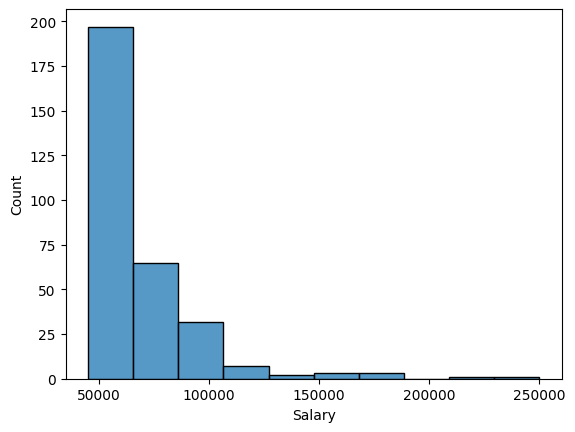

In [7]:
sns.histplot(df, x=df['Salary'], bins=10)
# Como era esperado, salários mais baixos são bem mais comuns do que salários mais altos.

### Fazer um gráfico de violino com salários, discriminados por gênero.

<Axes: xlabel='GenderID', ylabel='Salary'>

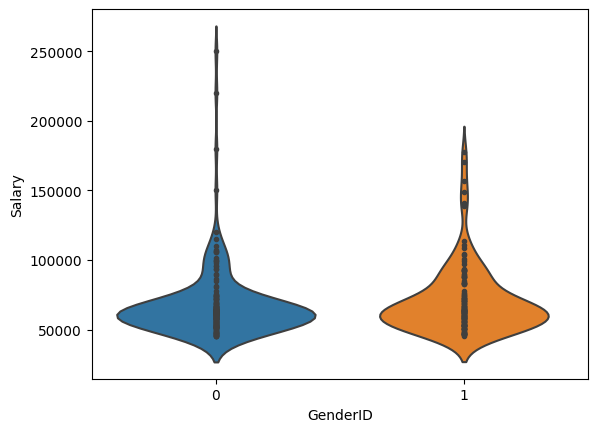

In [8]:
sns.violinplot(data=df, y='Salary', x='GenderID', inner="point")

### Traçar a série temporal correspondente à data de contratação (DateofHire)

c:\Users\mcemi\Documents\Coderhouse\.venv\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='DateofHire', ylabel='Salary'>

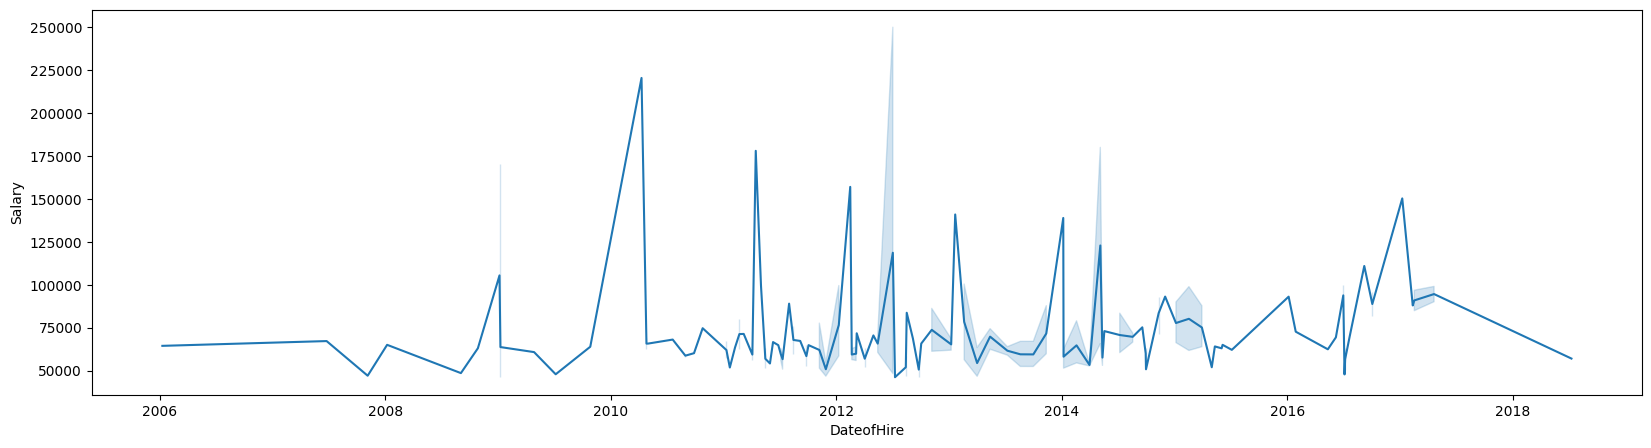

In [9]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df, x='DateofHire', y='Salary')
# Salários mais altos nem sempre estão relacionados ä mais tempo de empresa, e nem a contratações mais recentes... 